# Improving Plot Aesthetics

## Aesthetics



In the **Exploratory Data Visualization** last classes, we learned how to use visualizations to explore and understand data. Because we were focused on exploring trends and getting familiar with the data, we didn't focus much on tweaking the appearance of the plots to make them more presentable to others. We instead focused on the workflow of quickly creating, tweaking, displaying, and iterating on plots.

In the next section, we'll focus on how to use data visualization to communicate insights and tell stories. We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand. Along the way, we'll introduce the principles that informed those changes and provide a framework for you to apply them in the future. Here's a preview that demonstrates some of the improvements we make in this mission:


<img width="1000" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0Y3p4MkdLLXNuTDg">


## Introduction to the data



The [Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Here's a preview of the first few rows:

| Year | Agriculture | Architecture | Art and Performance | Biology   | Business  | Communications and Journalism | Computer Science | Education | Engineering |
|------|-------------|--------------|---------------------|-----------|-----------|-------------------------------|------------------|-----------|-------------|
| 1970 | 4.229798    | 11.921005    | 59.7                | 29.088363 | 9.064439  | 35.3                          | 13.6             | 74.535328 | 0.8         |
| 1971 | 5.452797    | 12.003106    | 59.9                | 29.394403 | 9.503187  | 35.5                          | 13.6             | 74.149204 | 1.0         |
| 1972 | 7.420710    | 13.214594    | 60.4                | 29.810221 | 10.558962 | 36.6                          | 14.9             | 73.554520 | 1.2         |


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/) that there is a gap.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Read **"percent-bachelors-degrees-women-usa.csv"** to the dataframe **women_degrees**.
- Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women:
    - Set the x-axis to the **Year** column from **women_degrees**.
    - Set the y-axis to the **Biology** column from **women_degrees**.
- Display the **plot**.



[]

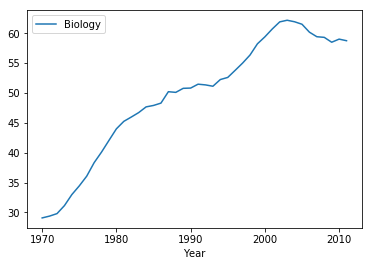

In [11]:
# put your code here
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
ax = women_degrees.plot(kind="line", x="Year", y="Biology")

ax.plot()




## Visualizing the gender gap



From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the **Biology** column from **100**. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

In [ ]:
# Option 1

import matplotlib.pyplot as plt

plt.plot(women_degrees['Year'], 
         women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 
         100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

In [ ]:
# Option 2
women_degrees["men_bio"] = 100 - women_degrees["Biology"]
women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green']).\
                        legend(loc='best',
                               labels=['Women','Men'])

In [ ]:
# option 3
# dataframe.plot return an axes object
ax = women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green'])
ax.legend(loc='best',labels=['Women','Men'])



## Data-Ink Ratio



The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the [data-ink ratio](http://www.infovis-wiki.net/index.php/Data-Ink_Ratio), which is the fractional amount of the plotting area dedicated to displaying the data.

The following is an animated GIF by [Darkhorse Analytics](http://blog.darkhorseanalytics.com/data-looks-better-naked) that shows a series of tweaks for boosting the data-ink ratio:


<img width="600" alt="creating a repo" src="http://cdn2.hubspot.net/hubfs/2020805/Imported_Blog_Media/data-ink.gif?t=1477583494534">


Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers. We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.


## Hiding tick marks

To customize the appearance of the ticks, we use the [Axes.tick_params()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call  **Axes.tick_params()**:

- **bottom: False**
- **top: False**
- **left: False**
- **right: False**



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Generate 2 line chart in the same plotting area:
    - One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to **"blue"** and the label to **"Women"**.
    - One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to **"green"** and the label to **"Men"**.
2. Remove all of the tick marks.
3. Set the title of the plot to **"Percentage of Biology Degrees Awarded By Gender"**.
4. Generate a legend and place it in the **"upper right"** location.
5. Display the chart.

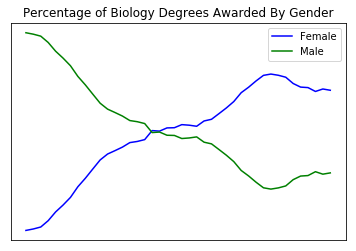

In [43]:
# put your code here
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], color="blue")
ax.plot(women_degrees["Year"], 100-women_degrees["Biology"], color="green")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Percentage of Biology Degrees Awarded By Gender")

ax.legend(["Female", "Male"])

#ax1 = women_degrees.plot(kind="line", y="Biology", x="Year")
#ax2 = women_degrees.plot(kind="line", y="Biology", x="Year")

## Hiding spines




With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner. In addition, the spines in the chart now are no longer necessary. When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges. When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart. By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the [matplotlib.spines.Spine](http://matplotlib.org/api/spines_api.html) class. When we create an Axes instance, four Spine objects are created for us. If you run **print(ax.spines)**, you'll get back a dictionary of the Spine objects:

```python
{'right': <matplotlib.spines.spine object="" at="" 0x111089c18="">, 
 'bottom': <matplotlib.spines.spine object="" at="" 0x111060898="">, 
 'top': <matplotlib.spines.spine object="" at="" 0x1110606a0="">, 
 'left': <matplotlib.spines.spine object="" at="" 0x11107cd30="">}
</matplotlib.spines.spine></matplotlib.spines.spine></matplotlib.spines.spine></matplotlib.spines.spine>
```


To hide all of the spines, we need to:

- access each Spine object in the dictionary
- call the **Spine.set_visible()** method
- pass in the Boolean value **False**

The following line of code removes the spines for the right axis:

```python
ax.spines["right"].set_visible(False)
```


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. In the previous exercise hide all of the spines.
2. Display the chart.

<generator object <genexpr> at 0x7f61ca7c2228>

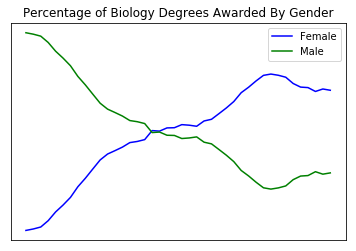

In [56]:
# put your code here
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], color="blue")
ax.plot(women_degrees["Year"], 100-women_degrees["Biology"], color="green")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Percentage of Biology Degrees Awarded By Gender")

ax.legend(["Female", "Male"])

(spine.set_visible(False) for spine in ax.spines)

## Comparing Gender Gap Across Degree Categories



So far, matplotlib has set the limits automatically for each axis and this hasn't had any negative effect on communicating our story with data. If we want to generate charts to compare multiple degree categories, the axis ranges need to be consistent. Inconsistent data ranges can distort the story our charts are telling and fool the viewer.

Edward Tufte often preaches that a good chart encourages comparison over just description. A good chart uses a consistent style for the elements that aren't directly conveying the data points. These elements are part of the non-data ink in the chart. By keeping the non-data ink as consistent as possible across multiple plots, differences in those elements stick out easily to the viewer. This is because our visual processing systems are excellent at discerning differences quickly and brings them to the front of our thought process. The similarities naturally fade to the back of our thought process.

Let's generate line charts for four STEM degree categories on a grid to encourage comparison. Our instructions for generating the chart are cumbersome. Here's what the final chart looks like, so you can refer to it as you write your code:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0M2NjazV1ZzZ6ZmM">



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Generate a line chart using the women and men percentages for **Biology** in the top left subplot.
2. Generate a line chart using the women and men percentages for **Computer Science** in the top right subplot.
3. Generate a line chart using the women and men percentages for **Engineering** in the bottom left subplot.
4. Generate a line chart using the women and men percentages for **Math and Statistics** in the bottom right subplot.
5. For all subplots:
    - For the line chart visualizing female percentages, set the line color to **"blue"** and the label to **"Women"**.
    - For the line chart visualizing male percentages, set the line color to **"green"** and the label to **"Men"**.
    - Set the **x-axis limit** to range from **1968 to 2011**.
    - Set the **y-axis limit** to range from **0 to 100**.
    - Hide all of the spines and tick marks.
    - Set the title of each subplot to the name of the major category (e.g. "Biology", "Computer Science").
5. Place a legend in the upper right corner of the bottom right subplot.
6. Display the plot.

Note: https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots

<generator object <genexpr> at 0x7f61c94d8f48>

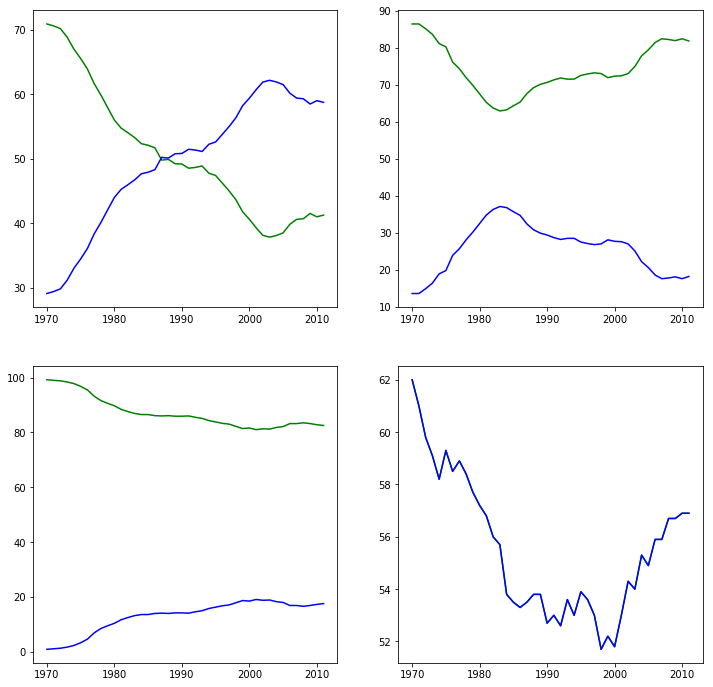

In [85]:
# put your code here
fig = plt.figure(figsize=(12,12))

#fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.plot(women_degrees["Year"], 100-women_degrees["Biology"], color="green")
ax.plot(women_degrees["Year"], women_degrees["Biology"], color="blue")

(spine.set_visible(False) for spine in ax.spines)

ax = fig.add_subplot(2,2,2)
ax.plot(women_degrees["Year"], 100-women_degrees["Computer Science"], color="green")
ax.plot(women_degrees["Year"], women_degrees["Computer Science"], color="blue")

(spine.set_visible(False) for spine in ax.spines)


ax = fig.add_subplot(2,2,3)
ax.plot(women_degrees["Year"], 100-women_degrees["Engineering"], color="green")
ax.plot(women_degrees["Year"], women_degrees["Engineering"], color="blue")

(spine.set_visible(False) for spine in ax.spines)


ax = fig.add_subplot(2,2,4)
ax.plot(women_degrees["Year"], 100-women_degrees["Math and Statistics"], color="green")
ax.plot(women_degrees["Year"], 100-women_degrees["Math and Statistics"], color="blue")

(spine["left"].set_visible(False) for spine in ax.spines)
(spine["right"].set_visible(False) for spine in ax.spines)
(spine["top"].set_visible(False) for spine in ax.spines)
(spine["botton"].set_visible(False) for spine in ax.spines)

## Next Steps


By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced. This chart can still be improved, however, and we'll explore more techniques in the next mission.

In this section, we explored how to enhance a chart's storytelling capabilities by minimizing chartjunk and encouraging comparison. In the next section, we'll explore how to use color, spacing, and weights to further enhance the storytelling capability of the plots.

# Color, Layout, and Annotations

## Introduction



In the previous section, we learned some basic techniques and principles for **making our plots more aesthetic**. In this section, we'll focus more directly on **customizing colors**, **line widths**, **layout**, and **annotations** to improve the ability for a viewer to extract insights from the charts. We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012.

We've gone ahead and read the data set into a DataFrame named **women_degrees**. We've also brought over the code we wrote at the end of the previous section to generate line charts for four STEM degree categories. If it's been a while since you completed the last section, spend some time getting familiar with the data set and the charts we generated.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# configure the number of visible columns
pd.set_option('display.max_columns', 100)

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
data = pd.concat([women_degrees,
                  women_degrees.iloc[:,1:].apply(lambda x: 100-x).rename(columns=lambda x: 'men_'+x)
                ],axis=1)
data.head()

In [ ]:
# Last section
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

areas_women = ['Biology','Computer Science','Engineering','Math and Statistics']
areas_men = ['men_'+i for i in areas_women]

for i in range(0,4):
    ax=data.plot(kind='line',x='Year',y=[areas_women[i],areas_men[i]],
                   title=areas_women[i],
                   color=['blue','green'], legend=False,
                   ax=axes[i//2, i%2])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2012)
    ax.set_ylim(0,100)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.legend(loc='best',labels=['Women','Men'])

plt.tight_layout()
plt.show()

## Color




So far, we've been using the [default matplotlib colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of [color blindness](https://en.wikipedia.org/wiki/Color_blindness). People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

The [Ishihara test](https://en.wikipedia.org/wiki/Ishihara_test) is a well known test for color blindness, where the person is asked to identify the number in the following image:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0T09oZnBRVmJ1eFU">

People with complete color vision can observe the number **74**. Some with partial color blindness see the number **21** instead and those with full color blindness can't see any number at all.

If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called **Color Blind 10** and was released by Tableau, the company that makes the data visualization platform of the same name. Navigate to [this page](http://tableaufriction.blogspot.com.br/2012/11/finally-you-can-use-tableau-data-colors.html) and select just the **Color Blind 10** option from the list of palettes to see the ten colors included in the palette.

## Setting Line Color Using RGB



The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (.):

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0Ui04LXpTUmV6N2M">

These numbers represent the **RGB values** for each color. The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color. The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively. In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. You can read more about 8-bit color [here](https://en.wikipedia.org/wiki/8-bit_color).

The first color in the palette is a color that resembles dark blue and has the following RGB values:

- Red: **0**
- Green: **107**
- Blue: **164**


To specify a line color using RGB values, we pass in a tuple of the values to the **color** parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255). In the following code, we scale the first color, which resembles dark blue, in the Color Blind 10 palette and set it as the line color:

```python
cb_dark_blue = (0/255,107/255,164/255)
women_degrees.plot(kind='line',x='Year',y='Biology', color=cb_dark_blue)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Modify the starter code to:
    - Set the line **color** for the line charts visualizing women percentages to the **dark blue** color from the Color Blind 10 palette (RGB value of (0, 107, 164)).
    - Set the line **color** for the line charts visualizing men percentages to the **orange color** from the Color Blind 10 palette (RGB value of (255, 128, 14)).
2. Display the figure after you've made these changes.


In [ ]:
# put your code here

## Setting Line Width



By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

We can use the **linewidth parameter** to specify the line width. Matplotlib expects a float value for this parameter:

```python
women_degrees.plot(kind='line',x='Year',y='Biology', linewidth=2)
```

The higher the line width, the thicker each line will be.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Modify the starter code to set the line widths for both line charts to **3**.


In [ ]:
# put your code here

## Improve the Layout and Ordering

So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:

- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

Here's what that would look like:

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0RUduMFp0LWMxczA">

The leftmost plot has the largest gender gap in 1968 while the rightmost plot has the smallest gender gap in 1968. If we're instead interested in the recent gender gaps in STEM degrees, we can order the plots from largest to smallest ending gender gaps. Here's what that would look like:

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0STFWMjhFRS1CYjQ">


In this exercise, you'll order the charts by decreasing ending gender gap. We've populated the list **areas_women** and **areas_men** with the six STEM degree categories. In the next step, we'll explore how we can replace the legend, which is currently overlapping with the rightmost line chart.




**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Modify the starter code to:
    - Change the width of the figure to a width of **20 inches** and a height of **3 inches**.
    - In the for loop, change the range to **(0,6)** instead of **(0,4)**.
    - Change the subplot layout from **2 rows** by **2 columns** to **1 row** by **6 columns**.
    - Use new list **areas_women** when generating and setting the titles for the line charts.

In [ ]:
# put your code here

## Replacing the Legend With Annotations



The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0aWhyM3V5LTZqM0k">

If you notice, even the position of the text annotations have meaning. In both plots, the annotation for **Men** is positioned above the orange line while the annotation for **Women** is positioned below the dark blue line. This positioning subtly suggests that men are a majority for the degree categories the line charts are representing (**Engineering** and **Math and Statistics**) and women are a minority for those degree categories.

Combined, these two observations suggest that we should stick with annotating just the leftmost and the rightmost line charts, prioritizing the data-ink ratio over the consistency of elements.

## Annotating in Matplotlib



To add text annotations to a matplotlib plot, we use the [Axes.text()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text) method. This method has a few required parameters:

- **x**: x-axis coordinate (as a float)
- **y**: y-axis coordinate (as a float)
- **s**: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. If we want to add text at the intersection of **1970** from the x-axis and **0** from the y-axis, we would pass in those values:

```python
ax.text(1970, 0, "starting point")
```


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Add the following text annotations in the leftmost chart:
    - The string **"Men"** at the x-axis coordinate of **2005** and the y-axis coordinate of **87**.
    - The string **"Women"** at the x-axis coordinate of **2002** and the y-axis coordinate of **8**.
2. Add the following text annotations in the rightmost chart:
    - The string **"Men"** at the x-axis coordinate of **2005** and the y-axis coordinate of **62**.
    - The string **"Women"** at the x-axis coordinate of **2001** and the y-axis coordinate of **35**.

In [ ]:
# put your code here

## Next Steps

In this mission, we learned how to improve the viewing experience by making our plots more color-blind friendly and thickening the line widths. We then explored how to use the layout and ordering of the plots as well annotations directly onto the plots to enhance the story that's being told to the viewer.

# Case Study: Visualizing The Gender Gap In College Degrees



## Introduction

In this case study, we'll extend the work we did in the last two sections on **visualizing the gender gap across college degrees**. So far, we mostly focused on the STEM degrees but now we will generate line charts to **compare across all degree categories**. In the last step of this case study, we'll explore how to export the final diagram we create as an image file. 

## Comparing across all degrees

Because there are seventeen degrees that we need to generate line charts for, we'll use a **subplot grid layout of 6 rows by 3 columns**. We can then group the degrees into STEM, liberal arts, and other, in the following way:

```python
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
```

Here's what the diagram will look like:

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0R01Sa0ZpMFU1UG8">

While in the last section, the **stem_cats** list was ordered by **ending gender gap**, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. You may have also noticed that while **stem_cats** and **other_cats** have **six degree categories as elements**, **lib_arts_cats** only has **five**. You'll need to not only modify the for loop to generate the STEM line charts that we wrote in the last section but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Generate a 6 row by 3 column grid of subplots.
- In the **first column**:
    - Generate **line charts** for both **male** and **female** percentages for every degree in **stem_cats**.
    - Add **text annotations** for **Women** and **Men** in the topmost and bottommost plots.
- In the **second column**:
    - Generate **line charts** for both **male** and **female** percentages for every degree in **lib_arts_cats.**
    - Add **text annotations** for **Women** and **Men** for only the topmost plot (since the lines overlap at the end in the bottommost plot).
- In the **third column:**
    - Generate **line charts** for both **male** and **female** percentages for every degree in **other_cats.**
    - Add **text annotations** for **Women** and **Men** in the topmost and bottommost plots.

In [ ]:
# put your code here

## Hiding x-axis labels

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to **Axes.tick_params()** and setting **bottom** to **False**:

```python
ax.tick_params(bottom=False, top=False, left=False, right=False, bottom=False)
```

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:

```python
ax.tick_params(bottom=True)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Disable the x-axis labels for all line charts except the bottommost line charts in each column.
- See what the diagram should look like.

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0RmthY0VxdFpLY2c">

## Setting y-axis labels

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how has that changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the **Axes.set_yticks()** method to specify which labels we want displayed. The following code enables just the 0 and 100 labels to be displayed:

```python
ax.set_yticks([0,100])
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- For all plots:
    - Enable just the y-axis labels at 0 and 100.
- See what the diagram should look like.

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1WvSuI4D5bL3KsZYURY_1awlgGSkpxMgl">


## Adding a horizontal line

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We can generate a horizontal line across an entire subplot using the [Axes.axhline()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.axhline) method. The only required parameter is the y-axis location for the start of the line:

```python
ax.axhline(50)
```

Let's use the next color in the [Color Blind 10](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) palette for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the **color** parameter and the transparency using the alpha parameter. The value passed in to the alpha parameter must range between 0 and 1:

```python
ax.axhline(50, color=(171/255, 171/255, 171/255), alpha=0.3)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- For all plots:
    - Generate a horizontal line with the following properties:
        - Starts at the y-axis position 50
        - Set to the third color (light gray) in the Color Blind 10 palette
        - Has a transparency of 0.3
- Save the results using **fig.savefig("gender_degrees.png")**
- See what the diagram should look like.

<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1j5AU2pZIscykVhGkoO7xnyn_Fnq35Vj3">

In [ ]:
# put your code here